In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import random
import gerrychain   
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain
from gerrychain.updaters import cut_edges, Tally
from gerrychain.tree import recursive_tree_part
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial

In [2]:
from gerrychain.random import random
random.seed(12345678)

In [1]:
# Import data

In [3]:
la_graph = Graph.from_file("./la_election/la_election_shapefile.shp")

In [2]:
# Calculate total population

In [4]:
tot_pop = sum([la_graph.nodes()[v]['TOTPOP'] for v in la_graph.nodes()])

In [5]:
tot_pop

4657757

In [6]:
num_dist = 6
ideal_pop = tot_pop/num_dist
initial_plan = recursive_tree_part(la_graph, range(num_dist), ideal_pop, 'TOTPOP', 0.02, 10)

In [3]:
# Set up random walk

In [7]:
initial_partition = Partition(
    la_graph,
    assignment=initial_plan,
    updaters={
        "our cut edges": cut_edges,
        "district population": Tally("TOTPOP", alias="district population")
    }
)

In [8]:
initial_partition

<Partition [6 parts]>

In [9]:
rw_proposal = partial(recom, pop_col="TOTPOP", pop_target=ideal_pop, epsilon=0.02, node_repeats=1)

In [10]:
population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition,
    0.02,
    pop_key="district population"
)

In [4]:
# Create Markov Chain

In [11]:
random_walk = MarkovChain(
    proposal = rw_proposal,
    constraints = [population_constraint],
    accept = accept.always_accept,
    initial_state = initial_partition,
    total_steps = 10000
)

In [5]:
# Calculate cut edges

In [12]:
cutedge_ensemble = []
for part in random_walk:
    cutedge_ensemble.append(len(part["our cut edges"]))

print(cutedge_ensemble)

[436, 473, 465, 461, 473, 504, 500, 562, 514, 470, 481, 522, 508, 483, 483, 468, 516, 485, 447, 492, 462, 478, 510, 489, 493, 475, 471, 535, 586, 565, 533, 546, 618, 644, 660, 596, 552, 619, 607, 611, 521, 515, 533, 542, 580, 600, 529, 539, 617, 557, 520, 529, 500, 558, 514, 481, 494, 511, 507, 562, 537, 594, 563, 576, 555, 577, 540, 521, 594, 552, 569, 549, 550, 562, 567, 540, 526, 538, 500, 518, 526, 535, 534, 518, 540, 566, 550, 617, 513, 466, 459, 529, 459, 489, 486, 479, 467, 402, 431, 542, 516, 556, 602, 558, 463, 456, 513, 502, 518, 525, 517, 527, 507, 623, 611, 619, 590, 602, 639, 645, 639, 647, 641, 572, 571, 541, 538, 522, 553, 537, 560, 566, 563, 531, 512, 520, 571, 590, 594, 586, 598, 619, 580, 581, 603, 600, 568, 559, 558, 551, 540, 467, 429, 447, 479, 481, 499, 526, 535, 543, 559, 519, 526, 495, 490, 468, 473, 509, 507, 518, 534, 553, 513, 501, 601, 543, 598, 577, 599, 563, 568, 547, 541, 490, 474, 487, 528, 546, 569, 553, 497, 490, 567, 501, 542, 508, 463, 487, 439, 446,

In [6]:
# Plot the cut edges

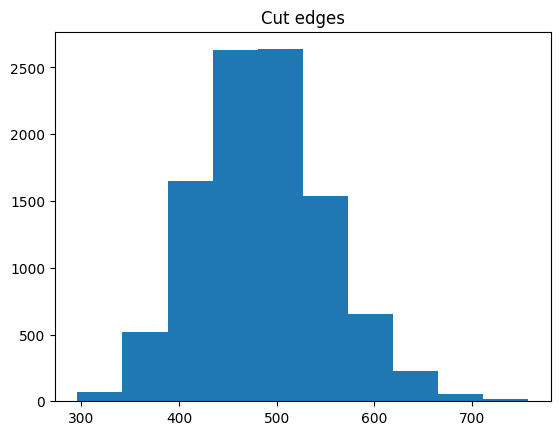

In [15]:
plt.figure()
plt.hist(cutedge_ensemble, align='left')
plt.title('Cut edges')
plt.savefig('cut_edges.png', format='png', dpi=300)
plt.show()